In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import psycopg2
import os
from dotenv import load_dotenv
from db_connect import db_connect
import matplotlib.font_manager as fm
import numpy as np

DB connect 성공


C:\Users\hyunsu\AppData\Local\Temp\ipykernel_23024\3150170243.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql("SELECT * FROM cafe WHERE congestion_score IS NOT NULL",conn)
c:\Users\hyunsu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


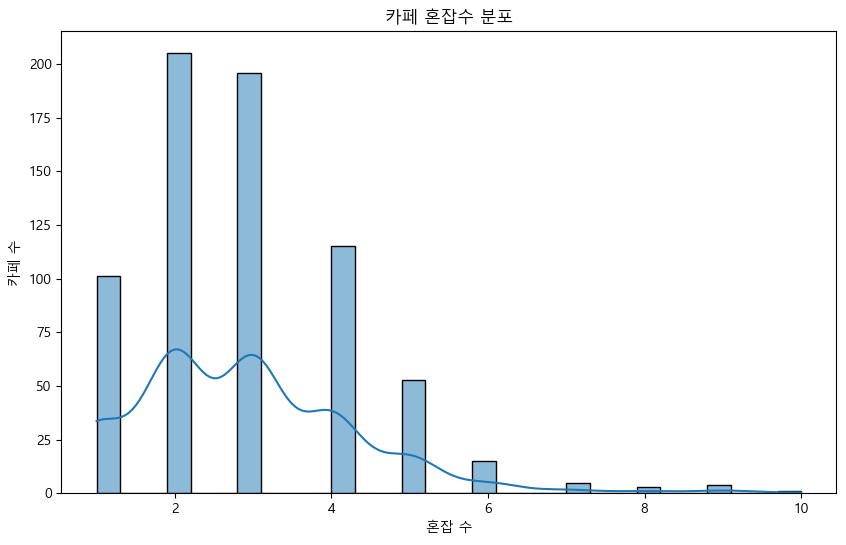

In [3]:
# DB 연결
cur,conn=db_connect()

# 데이터 프레임으로 불러오기
df= pd.read_sql("SELECT * FROM cafe WHERE congestion_score IS NOT NULL",conn)
df.replace([float('inf'), float('-inf')],pd.NA, inplace=True)

# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
sns.histplot(df["congestion_score"],bins=30,kde=True)
plt.title("카페 혼잡수 분포")
plt.xlabel("혼잡 수")
plt.ylabel("카페 수")
plt.show()

cur.close()
conn.close()


               address region
0     서울 강남구 역삼동 818-1    강남구
1     서울 강남구 신사동 651-4    강남구
2    서울 강남구 역삼동 824-25    강남구
3       서울 강남구 논현동 1-3    강남구
4     서울 강남구 논현동 62-24    강남구
..                 ...    ...
693  서울 용산구 한남동 744-19    용산구
694  서울 강남구 청담동 124-18    강남구
695      서울 종로구 당주동 30    종로구
696  서울 강남구 신사동 541-15    강남구
697  서울 강남구 역삼동 813-17    강남구

[698 rows x 2 columns]
region
중구      7.000000
성동구     3.314815
마포구     3.271186
종로구     2.979381
용산구     2.857143
광진구     2.698113
강남구     2.642857
서대문구    2.642105
Name: congestion_score, dtype: float64


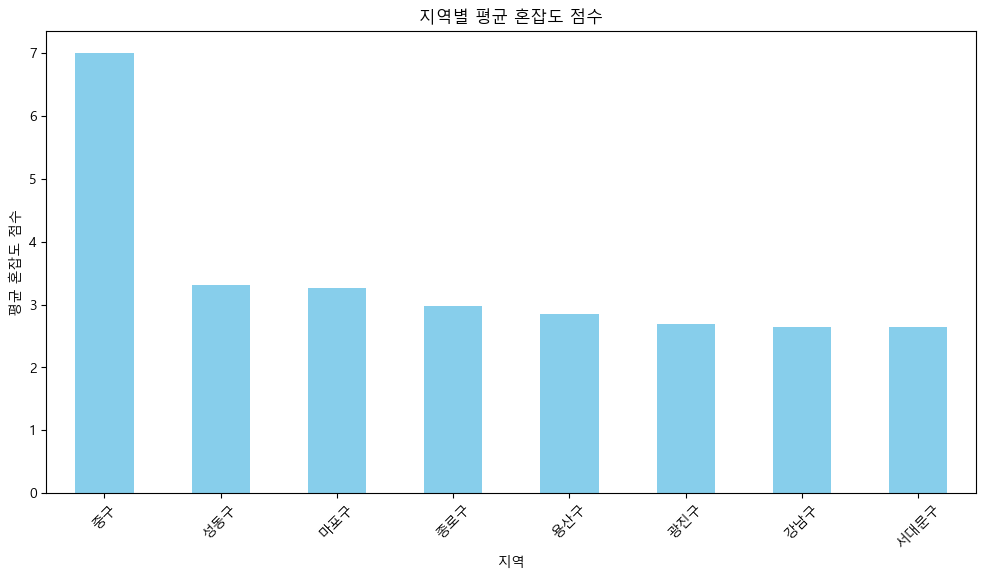

In [16]:
# 지역 추출
df['region']=df['address'].apply(lambda x: x.split()[1] if x and len(x.split()) > 1 else None)
print(df[['address','region']])

# 지역별 평균 혼잡도 계산
region_congestion = df.groupby('region')['congestion_score'].mean().sort_values(ascending=False)
print(region_congestion)



# 시각화
plt.figure(figsize=(12,6))
region_congestion.plot(kind='bar',color='skyblue')
plt.title("지역별 평균 혼잡도 점수")
plt.xlabel("지역")
plt.ylabel("평균 혼잡도 점수")
plt.xticks(rotation=45)
plt.tight_layout
plt.show()